In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_BMKG = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BMKG/BMKG.csv",index_col='Bulan')
print(dataset_BMKG.shape)
dataset_BMKG.head(72)

(72, 6)


,Tn,Tx,Tavg,RH_avg,RR,ss
Bulan,,,,,,
15-Jan,25.24,30.65,27.34,81.42,16.72,3.63
15-Feb,24.81,29.83,27.04,83.61,32.27,4.13
15-Mar,25.52,31.26,28.16,78.37,9.27,5.24
15-Apr,26.31,32.14,28.71,77.10,4.20,5.58
15-May,26.47,32.73,29.19,72.48,2.78,7.09
...,...,...,...,...,...,...
20-Aug,26.46,32.65,29.01,73.87,4.87,7.75
20-Sep,27.19,32.98,29.48,72.12,0.55,7.51
20-Oct,26.09,32.59,29.01,76.00,4.92,6.75


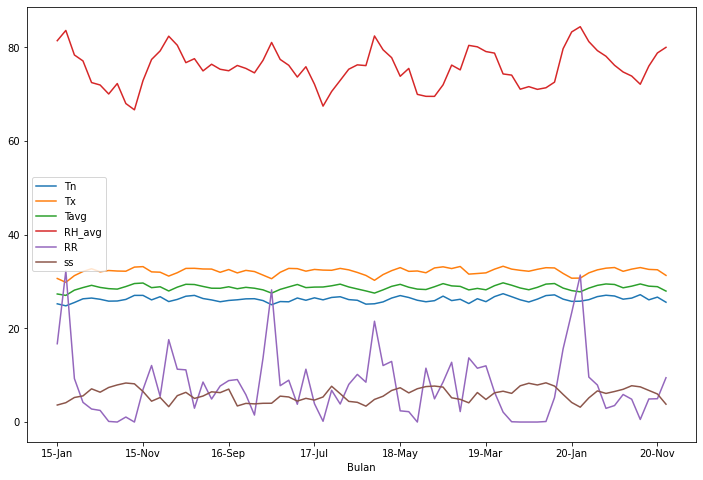

In [ ]:
# df.columns = ['BMKG']
dataset_BMKG.plot(figsize=(12,8))

In [ ]:
RR_data = dataset_BMKG.drop(columns=['Tn','Tx','Tavg','RH_avg','ss'])
RR_data

,RR
Bulan,
15-Jan,16.72
15-Feb,32.27
15-Mar,9.27
15-Apr,4.20
15-May,2.78
...,...
20-Aug,4.87
20-Sep,0.55
20-Oct,4.92


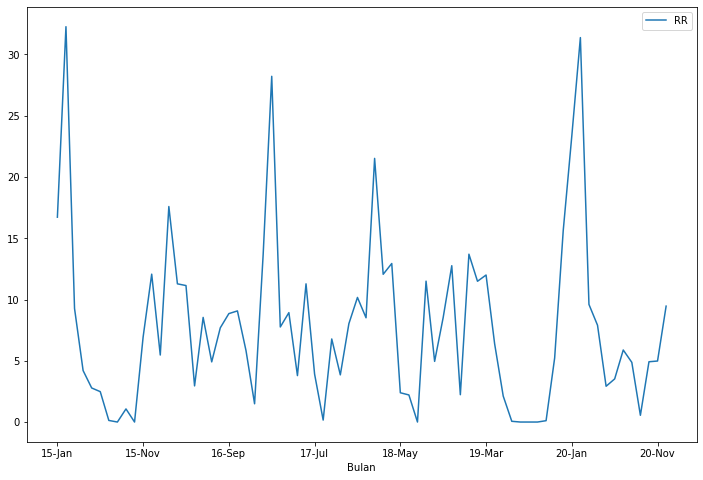

In [ ]:
# df.columns = ['BMKG']
RR_data.plot(figsize=(12,8))

In [ ]:
RR_data['1b']=RR_data['RR'].shift(+1)
RR_data['2b']=RR_data['RR'].shift(+2)
RR_data['3b']=RR_data['RR'].shift(+3)
RR_data

,RR,1b,2b,3b
Bulan,,,,
15-Jan,16.72,NaN,NaN,NaN
15-Feb,32.27,16.72,NaN,NaN
15-Mar,9.27,32.27,16.72,NaN
15-Apr,4.20,9.27,32.27,16.72
15-May,2.78,4.20,9.27,32.27
...,...,...,...,...
20-Aug,4.87,5.88,3.52,2.92
20-Sep,0.55,4.87,5.88,3.52
20-Oct,4.92,0.55,4.87,5.88


In [ ]:
RR_data=RR_data.dropna()
RR_data

,RR,1b,2b,3b
Bulan,,,,
15-Apr,4.20,9.27,32.27,16.72
15-May,2.78,4.20,9.27,32.27
15-Jun,2.48,2.78,4.20,9.27
15-Jul,0.13,2.48,2.78,4.20
15-Aug,0.00,0.13,2.48,2.78
...,...,...,...,...
20-Aug,4.87,5.88,3.52,2.92
20-Sep,0.55,4.87,5.88,3.52
20-Oct,4.92,0.55,4.87,5.88


In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
import numpy as np
x1,x2,x3,y=RR_data['1b'],RR_data['2b'],RR_data['3b'],RR_data['RR']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 9.27 32.27 16.72]
 [ 4.2   9.27 32.27]
 [ 2.78  4.2   9.27]
 [ 2.48  2.78  4.2 ]
 [ 0.13  2.48  2.78]
 [ 0.    0.13  2.48]
 [ 1.07  0.    0.13]
 [ 0.    1.07  0.  ]
 [ 6.94  0.    1.07]
 [12.07  6.94  0.  ]
 [ 5.47 12.07  6.94]
 [17.59  5.47 12.07]
 [11.28 17.59  5.47]
 [11.14 11.28 17.59]
 [ 2.95 11.14 11.28]
 [ 8.54  2.95 11.14]
 [ 4.91  8.54  2.95]
 [ 7.69  4.91  8.54]
 [ 8.85  7.69  4.91]
 [ 9.07  8.85  7.69]
 [ 5.83  9.07  8.85]
 [ 1.49  5.83  9.07]
 [13.66  1.49  5.83]
 [28.22 13.66  1.49]
 [ 7.76 28.22 13.66]
 [ 8.93  7.76 28.22]
 [ 3.79  8.93  7.76]
 [11.28  3.79  8.93]
 [ 3.91 11.28  3.79]
 [ 0.16  3.91 11.28]
 [ 6.78  0.16  3.91]
 [ 3.85  6.78  0.16]
 [ 8.03  3.85  6.78]
 [10.17  8.03  3.85]
 [ 8.51 10.17  8.03]
 [21.52  8.51 10.17]
 [12.06 21.52  8.51]
 [12.94 12.06 21.52]
 [ 2.39 12.94 12.06]
 [ 2.21  2.39 12.94]
 [ 0.    2.21  2.39]
 [11.5   0.    2.21]
 [ 4.95 11.5   0.  ]
 [ 8.54  4.95 11.5 ]
 [12.76  8.54  4.95]
 [ 2.23 12.76  8.54]
 [13.7   2.23 12.76]
 [11.49 13.7 

In [ ]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [ ]:
model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Ridge()

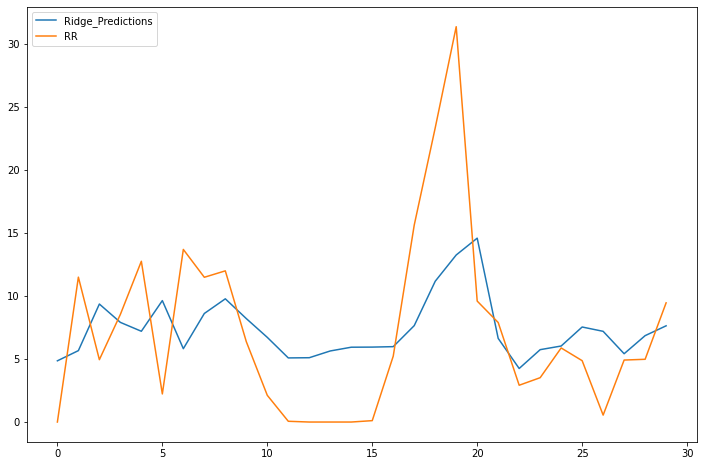

In [ ]:
pred_ridge=ridge_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred_ridge,label='Ridge_Predictions')
plt.plot(y_test,label='RR')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_lr=sqrt(mean_squared_error(pred_ridge,y_test))
print('Root Mean Squared Error for Ridge Model is:',rmse_lr)

Root Mean Squared Error for Ridge Model is: 5.910844403124985


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ridge_model, final_x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE Random Ridge Model : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE Random Ridge Model : -4.602 (1.681)


In [ ]:
# model = RidgeRegression()
yhat = ridge_model.predict(X_test)

print('Prediction: ', yhat)
print('Score Accuracy: ',ridge_model.score(X_test, y_test))

Prediction:  [[ 4.85902515]
 [ 5.66821177]
 [ 9.36535587]
 [ 7.910075  ]
 [ 7.20487415]
 [ 9.63897991]
 [ 5.82333426]
 [ 8.61585332]
 [ 9.77978966]
 [ 8.21083036]
 [ 6.72051301]
 [ 5.08886722]
 [ 5.10509387]
 [ 5.6414453 ]
 [ 5.93898058]
 [ 5.94770031]
 [ 5.98346305]
 [ 7.65143317]
 [11.17383631]
 [13.25892839]
 [14.59519412]
 [ 6.63875482]
 [ 4.25041935]
 [ 5.74441314]
 [ 6.03365502]
 [ 7.5430858 ]
 [ 7.1999738 ]
 [ 5.42149033]
 [ 6.85640414]
 [ 7.63789091]]
Score Accuracy:  0.3126587138544137
